<a href="https://colab.research.google.com/github/AlmahdiPen/Visi_Komputer_TI-2A/blob/main/klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana


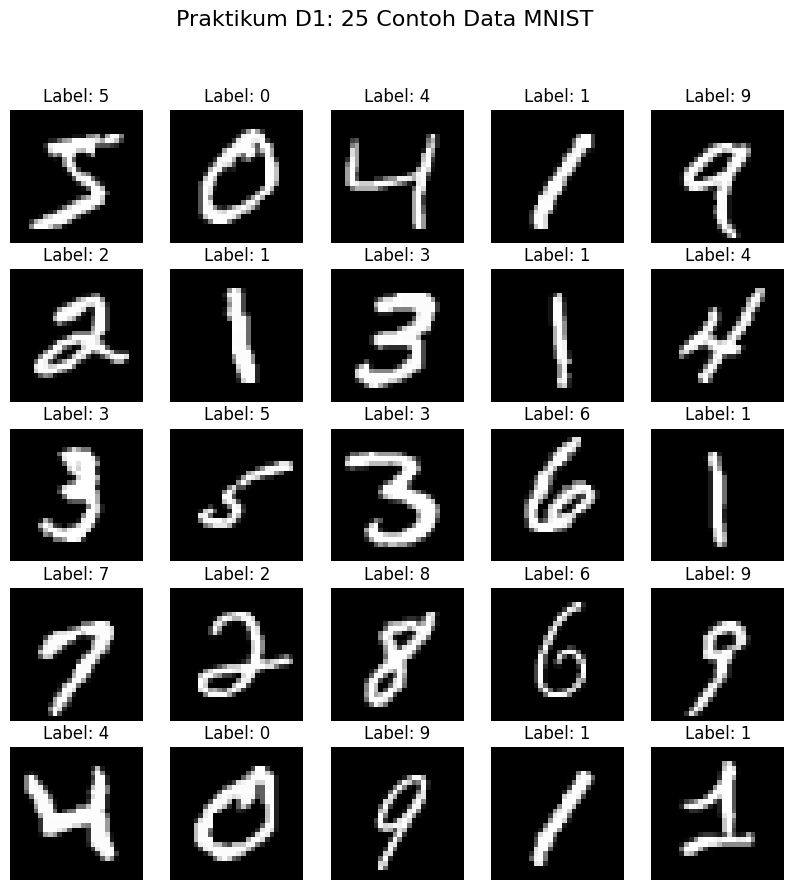

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Memuat dataset MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Normalisasi data
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

# [TUGAS KECIL D1] Menampilkan 25 contoh, bukan 9
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_mnist[i], cmap='gray')
    plt.title(f"Label: {y_train_mnist[i]}")
    plt.axis('off')
plt.suptitle('Praktikum D1: 25 Contoh Data MNIST', fontsize=16)
plt.show()

Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [74]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten gambar untuk input SVM
x_train_flat = x_train_mnist.reshape(len(x_train_mnist), -1)
x_test_flat = x_test_mnist.reshape(len(x_test_mnist), -1)

# [TUGAS KECIL D2] Mengubah kernel dari 'linear' menjadi 'rbf'
print("Melatih model SVM dengan kernel 'rbf'...")

# Menggunakan subset data agar training tidak terlalu lama
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train_mnist[:5000])

# Uji model dan cetak akurasi
y_pred_svm = clf.predict(x_test_flat)
accuracy_svm = accuracy_score(y_test_mnist, y_pred_svm)
print(f"Praktikum D2: Akurasi SVM dengan kernel 'rbf': {accuracy_svm:.4f}")

Melatih model SVM dengan kernel 'rbf'...
Praktikum D2: Akurasi SVM dengan kernel 'rbf': 0.9513


Praktikum D3 – Membangun CNN Sederhana

Melatih model CNN untuk MNIST...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8908 - loss: 0.3561 - val_accuracy: 0.9852 - val_loss: 0.0541
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9837 - loss: 0.0529 - val_accuracy: 0.9903 - val_loss: 0.0364
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9899 - loss: 0.0337 - val_accuracy: 0.9888 - val_loss: 0.0448
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0240 - val_accuracy: 0.9885 - val_loss: 0.0428
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9910 - val_loss: 0.0406


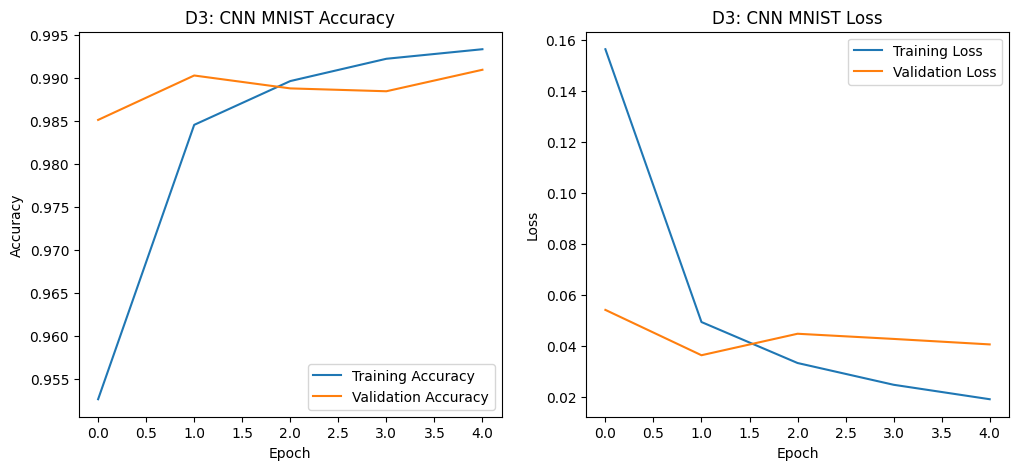

In [75]:
# Reshape data untuk input CNN (menambah channel)
x_train_cnn_mnist = x_train_mnist[..., np.newaxis]
x_test_cnn_mnist = x_test_mnist[..., np.newaxis]

# [TUGAS KECIL D3] Menambahkan satu lapisan Conv2D dan MaxPooling2D lagi
model_mnist = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # --- Lapisan Tambahan ---
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # -----------------------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_mnist.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("Melatih model CNN untuk MNIST...")
history_mnist = model_mnist.fit(x_train_cnn_mnist, y_train_mnist, epochs=5, validation_split=0.1)

# Plot history untuk akurasi dan loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('D3: CNN MNIST Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.title('D3: CNN MNIST Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Melatih model CNN untuk CIFAR-10...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2822 - loss: 1.9295 - val_accuracy: 0.5040 - val_loss: 1.3967
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4465 - loss: 1.5024 - val_accuracy: 0.5642 - val_loss: 1.2383
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5013 - loss: 1.3663 - val_accuracy: 0.5708 - val_loss: 1.1817
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5408 - loss: 1.2849 - val_accuracy: 0.6242 - val_loss: 1.0679
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5604 - loss: 1.2149 - val_accuracy: 0.6312 - val_loss: 1.0444
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5839 - loss: 1.1603 - val_accuracy: 0.6554 - val_loss: 0.9849
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6064 - loss: 1.1141 - val_accuracy: 0.6660 - val_loss: 0.9640
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/ste

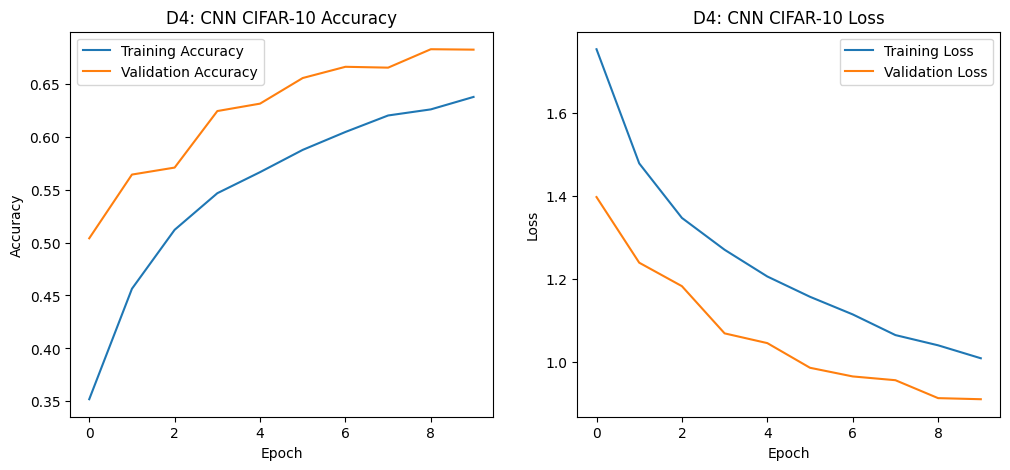

In [76]:
# Load & normalisasi data CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

# [TUGAS KECIL D4] Menambahkan lapisan Dropout
model_cifar = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # --- Lapisan Tambahan ---
    tf.keras.layers.Dropout(0.5),
    # -----------------------
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("Melatih model CNN untuk CIFAR-10...")
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=10, validation_split=0.1)

# Plot history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Training Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('D4: CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Training Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.title('D4: CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Membangun model Transfer Learning VGG16 untuk Fine-Tuning...
Melatih model Transfer Learning (Fine-Tuning)...
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3478 - loss: 1.8318 - val_accuracy: 0.6858 - val_loss: 0.9286
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.6515 - loss: 1.0337 - val_accuracy: 0.7284 - val_loss: 0.7814
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7048 - loss: 0.8867 - val_accuracy: 0.7548 - val_loss: 0.7178
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7369 - loss: 0.7790 - val_accuracy: 0.7580 - val_loss: 0.6990
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7672 - loss: 0.7026 - val_accuracy: 0.7736 - val_loss: 0.6483


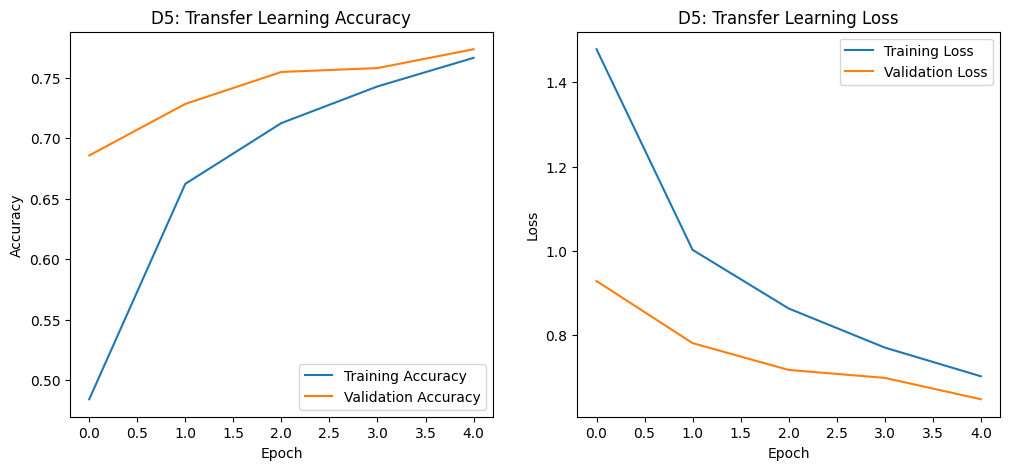

In [78]:
# Karena VGG16 butuh input lebih besar, kita resize gambar CIFAR-10
# Note: Ini akan memakan waktu lebih lama
x_train_cifar_resized = tf.image.resize(x_train_cifar, (48, 48))

print("Membangun model Transfer Learning VGG16 untuk Fine-Tuning...")
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False # Awalnya bekukan seluruh base model

# [TUGAS KECIL D5] Aktifkan (unfreeze) lapisan di blok konvolusi terakhir
for layer in base_model.layers[-4:]:
    layer.trainable = True

model_tl = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Gunakan learning rate yang sangat kecil untuk fine-tuning
model_tl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("Melatih model Transfer Learning (Fine-Tuning)...")
history_tl = model_tl.fit(x_train_cifar_resized, y_train_cifar, epochs=5, validation_split=0.1)

# Plot history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('D5: Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('D5: Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

Membuat laporan evaluasi untuk model CNN CIFAR-10 (dari D4)...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.77      0.86      0.81      1000
           2       0.59      0.50      0.54      1000
           3       0.48      0.49      0.49      1000
           4       0.64      0.57      0.60      1000
           5       0.62      0.55      0.58      1000
           6       0.76      0.78      0.77      1000
           7       0.72      0.74      0.73      1000
           8       0.74      0.84      0.78      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Confusion Matrix:


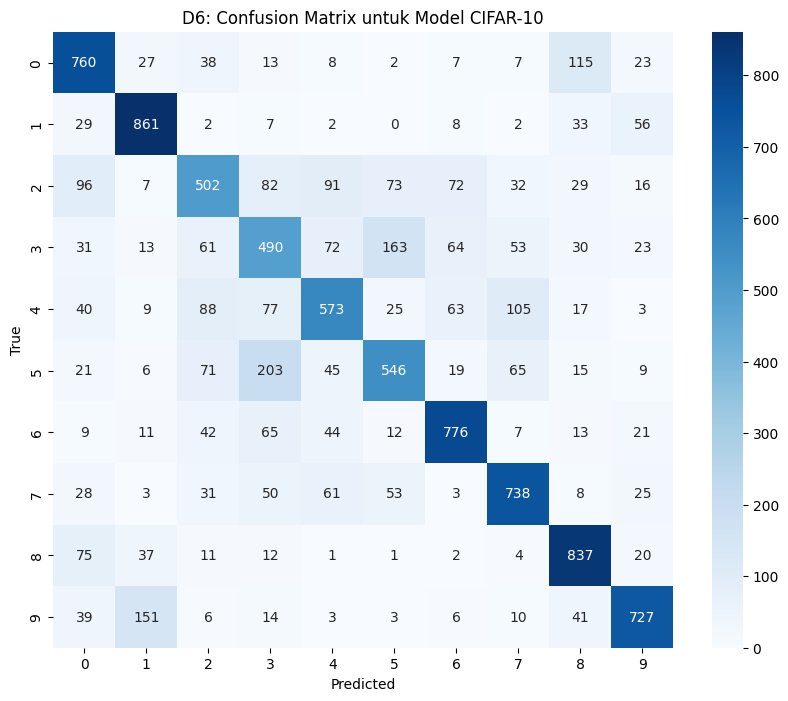

In [80]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("Membuat laporan evaluasi untuk model CNN CIFAR-10 (dari D4)...")
y_pred_cifar = np.argmax(model_cifar.predict(x_test_cifar), axis=-1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_cifar, y_pred_cifar))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test_cifar, y_pred_cifar)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('D6: Confusion Matrix untuk Model CIFAR-10')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

penugasan


In [81]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
    arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize to 32x32 and convert to RGB
    img = img.resize((32, 32), Image.Resampling.LANCZOS)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0

    # No need to add channel dim, already 3 channels
    return img, arr

Saving Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d.jpg to Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d (1).jpg
Saving Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5.jpg to Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (2).jpg
Saving Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f.jpg to Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (2).jpg


##CNN


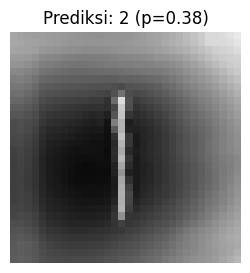

Rekap Prediksi (CNN):
- Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d (1).jpg -> 2 (p=0.430)
- Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (2).jpg -> 3 (p=0.409)
- Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (2).jpg -> 2 (p=0.379)


In [82]:
import matplotlib.pyplot as plt
results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0) # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0] # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

# Tampilkan hasil
plt.figure(figsize=(3,3))
plt.imshow(disp, cmap='gray')
plt.title(f"Prediksi: {pred} (p={conf:.2f})")
plt.axis('off')
plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

##SVM

In [93]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_for_svm(img_pil) # x: (28,28) float [0,1]
    x_flat = x.reshape(1, -1) # (1,784)
    pred = int(clf.predict(x_flat)[0])

    # SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
    # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass
    results.append((fname, pred, conf))

# Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
for r in results:
    print(f"{r[0]} -> Prediksi SVM: {r[1]}" + (f" (p≈{r[2]:.2f})" if r[2] is not None else ""))

# Optional: display the preprocessed image
# plt.figure(figsize=(3,3))
# plt.imshow(disp, cmap='gray')
# plt.title(f"Prediksi SVM: {pred}")
# plt.axis('off')
# plt.show()

Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d (1).jpg -> Prediksi SVM: 2
Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (2).jpg -> Prediksi SVM: 2
Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (2).jpg -> Prediksi SVM: 2
